In [370]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_columns', None)

In [371]:
#drop base_egg_steps
#binning experience growth, capture rate
pokemon = pd.read_csv('pokemon_bin_1.csv')
pokemon.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_happiness,base_total,defense,height_m,hp,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary,capture_rate_bin,experience_growth_bin
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,70,318,49,0.7,45,Bulbasaur,65,65,45,grass,poison,6.9,0,0-0.5,Below 1.1M
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,70,405,63,1.0,60,Ivysaur,80,80,60,grass,poison,13.0,0,0-0.5,Below 1.1M
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,70,625,123,2.0,80,Venusaur,122,120,80,grass,poison,100.0,0,0-0.5,Below 1.1M
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,70,309,43,0.6,39,Charmander,60,50,65,fire,none,8.5,0,0-0.5,Below 1.1M
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,70,405,58,1.1,58,Charmeleon,80,65,80,fire,none,19.0,0,0-0.5,Below 1.1M


In [372]:
pokemon.isnull().sum()

against_bug              0
against_dark             0
against_dragon           0
against_electric         0
against_fairy            0
against_fight            0
against_fire             0
against_flying           0
against_ghost            0
against_grass            0
against_ground           0
against_ice              0
against_normal           0
against_poison           0
against_psychic          0
against_rock             0
against_steel            0
against_water            0
attack                   0
base_happiness           0
base_total               0
defense                  0
height_m                 0
hp                       0
name                     0
sp_attack                0
sp_defense               0
speed                    0
type1                    0
type2                    0
weight_kg                0
is_legendary             0
capture_rate_bin         0
experience_growth_bin    0
dtype: int64

In [373]:
pokemon = pokemon.set_index('name')
pokemon.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_happiness,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary,capture_rate_bin,experience_growth_bin
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,70,318,49,0.7,45,65,65,45,grass,poison,6.9,0,0-0.5,Below 1.1M
Ivysaur,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,70,405,63,1.0,60,80,80,60,grass,poison,13.0,0,0-0.5,Below 1.1M
Venusaur,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,70,625,123,2.0,80,122,120,80,grass,poison,100.0,0,0-0.5,Below 1.1M
Charmander,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,70,309,43,0.6,39,60,50,65,fire,none,8.5,0,0-0.5,Below 1.1M
Charmeleon,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,70,405,58,1.1,58,80,65,80,fire,none,19.0,0,0-0.5,Below 1.1M


In [374]:
df = pd.get_dummies(pokemon)

In [375]:
df

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_happiness,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg,is_legendary,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water,type2_bug,type2_dark,type2_dragon,type2_electric,type2_fairy,type2_fighting,type2_fire,type2_flying,type2_ghost,type2_grass,type2_ground,type2_ice,type2_none,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water,capture_rate_bin_0-0.5,capture_rate_bin_0.5-1,capture_rate_bin_1-1.5,capture_rate_bin_1.5-2.0,capture_rate_bin_2.0-2.5,capture_rate_bin_2.5+,experience_growth_bin_Above 1.1M,experience_growth_bin_Below 1.1M
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,70,318,49,0.7,45,65,65,45,6.9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
Ivysaur,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,70,405,63,1.0,60,80,80,60,13.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
Venusaur,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,70,625,123,2.0,80,122,120,80,100.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
Charmander,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,70,309,43,0.6,39,60,50,65,8.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Charmeleon,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,70,405,58,1.1,58,80,65,80,19.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Celesteela,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,101,0,570,103,9.2,97,107,101,61,999.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
Kartana,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,181,0,570,131,0.3,59,59,31,109,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
Guzzlord,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,101,0,570,53,5.5,223,97,53,43,888.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [376]:
X, y = df.drop(['is_legendary'], axis = 1), df['is_legendary']


# Step 1 PCA
The first PCA is to help us find the best components that explains 85% of the variance data

In [377]:
#PCA Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [378]:
#Application of PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

PCA()

In [379]:
#Explaining Eigenvalues & Explained Variance
print("Eigenvalues:")
print(pca.explained_variance_)
print()

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Eigenvalues:
[6.30094880e+00 4.63343802e+00 3.74427356e+00 3.23451196e+00
 3.01228490e+00 2.76357141e+00 2.56506116e+00 2.26954505e+00
 2.16608953e+00 2.03928502e+00 1.78463722e+00 1.76554126e+00
 1.67880499e+00 1.56135955e+00 1.50126718e+00 1.42003180e+00
 1.40452288e+00 1.37625523e+00 1.27431501e+00 1.25300376e+00
 1.22133265e+00 1.21242957e+00 1.18804833e+00 1.14173018e+00
 1.09974915e+00 1.09098359e+00 1.06946276e+00 1.04985962e+00
 1.03169481e+00 1.00824527e+00 9.84950220e-01 9.68878686e-01
 9.48601977e-01 9.16969554e-01 9.11581103e-01 8.55824280e-01
 8.24713586e-01 8.05870019e-01 7.79711634e-01 7.35854846e-01
 6.87864976e-01 6.55235983e-01 6.29021041e-01 5.98786490e-01
 4.87918094e-01 4.39806065e-01 4.08870405e-01 3.31603015e-01
 2.97540374e-01 2.19490213e-01 1.18625468e-01 9.37063123e-02
 7.54659447e-02 6.57670285e-02 6.12130816e-02 5.43840299e-02
 5.02904542e-02 4.03642122e-02 3.34652212e-02 3.27843941e-02
 2.81041092e-02 2.47625637e-02 1.79567816e-02 1.38508139e-02
 1.23976706

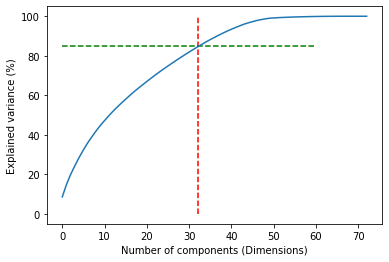

In [380]:
# Making the scree line plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.vlines(x=32, ymax=100, ymin=0, colors="r", linestyles="--")
plt.hlines(y=85, xmax=60, xmin=0, colors="g", linestyles="--")

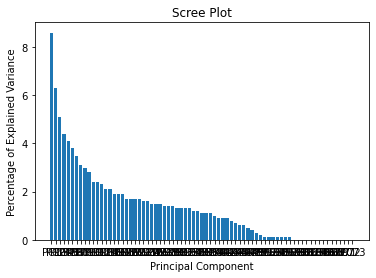

In [381]:
# Making the scree bar plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [382]:
#Apply 32 Components to PCA for modeling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
pca = PCA(n_components=32)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)

In [383]:
print(X_pca.head())
print(X_pca.shape)

          0         1         2         3         4         5         6  \
0 -2.614921 -1.987204  1.714943 -0.955807 -2.091044  0.160625  2.183714   
1 -1.616347 -2.334020  1.827576 -0.749533 -2.179113 -0.224133  2.320710   
2  1.179545 -3.095735  2.192368 -0.405588 -2.577264 -1.213099  2.698719   
3 -1.377015  1.803467  0.020516  2.240761 -0.196250  0.338637  0.480974   
4 -0.225566  1.402150  0.144521  2.477205 -0.284033 -0.087875  0.640800   

          7         8         9        10        11        12        13  \
0  0.106599  0.161330 -0.021945 -1.460120 -0.344884 -1.392896 -2.453276   
1  0.000501  0.170565 -0.465097 -1.423657 -0.455220 -1.380329 -2.444473   
2 -0.262106 -0.109564 -1.462713 -1.440579 -0.742470 -1.328738 -2.298856   
3  0.867796  2.835109 -0.488340 -0.237377  1.721201 -0.271874  0.380674   
4  0.743726  2.843177 -0.985637 -0.215959  1.575700 -0.257973  0.420075   

         14        15        16        17        18        19        20  \
0  0.767667 -0.012710 -

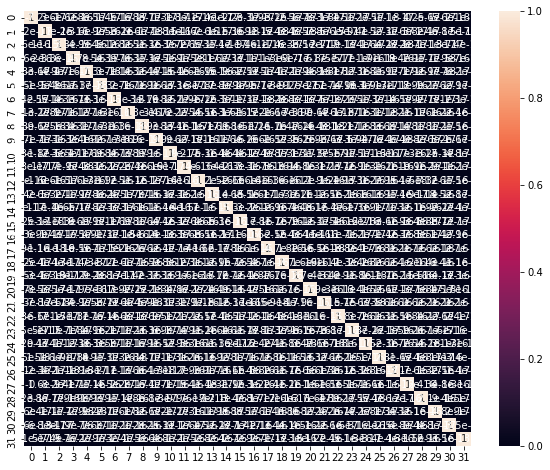

In [384]:
#Checking all correlations of the PCA Feature data to make sure no correlation exists
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), 
            annot=True)

PCA is able to transfer all correlated features into all non-correlated features

In [385]:
# Make train and test sets based on PCA
train_X_pca, test_X_pca, train_y, test_y = train_test_split(X_pca, y, train_size = 0.8, test_size = 0.2, stratify = y)

In [386]:
test_X_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
534,-2.643111,1.442352,-1.073528,1.034691,2.659578,0.575297,0.372553,0.004902,-1.576301,0.126101,-0.948309,-0.164253,-0.200235,-0.536966,-0.824350,0.380129,0.097963,0.046733,-0.233978,-0.739359,-1.224555,-0.735982,-0.628966,-0.684485,0.353386,-1.065285,0.409994,0.382039,0.092488,-0.447695,0.492398,0.960205
384,4.018215,1.960432,3.979519,-0.722442,1.041477,-1.307693,-0.674430,2.592981,-0.418627,1.207043,-1.197835,-1.171587,0.303726,-0.265445,-1.262158,-2.501381,-0.272089,2.870630,0.062324,3.294403,2.278604,0.081919,-2.185820,-1.025107,1.782745,1.268177,1.715407,-1.054119,0.287642,1.069701,0.407521,0.228365
574,-0.543101,0.389032,2.534694,-1.441392,3.194466,0.045871,-0.212850,-0.217492,1.111208,-1.220878,-0.211937,0.295860,0.458704,1.765178,0.495465,-0.969239,-0.277430,0.132308,-0.517777,0.046833,-1.462284,0.115955,0.869216,-0.833684,-1.223428,-0.912366,-0.621111,-0.350429,-0.070363,-0.296683,-0.723818,-0.732507
625,0.715496,0.001450,-2.127969,0.267812,-0.362955,-1.164647,-0.308346,0.450880,-0.050958,-1.351251,-0.685135,-1.546081,-1.822052,0.945473,-0.682932,0.368905,0.384524,0.022212,0.046902,0.828167,-0.113428,0.177661,0.306483,0.151561,0.028799,0.101000,-0.237369,0.473525,-0.136479,-0.006344,0.570590,-0.422255
769,2.306944,2.678614,3.809915,-2.421700,-1.410993,3.133381,0.392661,-2.261801,-0.774895,-1.728608,1.321846,-1.739844,0.349563,0.228696,0.169473,1.283595,2.358253,-1.738544,0.520551,-1.461827,0.873539,-1.693614,-1.252696,-1.924201,-0.025155,0.511135,-1.101584,-0.321208,-0.528005,-0.478933,-1.778342,-0.283764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,0.845943,-4.599733,0.782947,-2.106990,-1.284487,-5.461131,-0.121355,-2.785159,1.176370,2.768790,0.143178,-0.815255,0.990476,-2.634502,-0.178296,0.302612,0.956982,1.044876,0.921230,-0.244490,0.285917,-0.388542,0.851857,-0.376319,0.343020,-0.328167,-0.607570,0.703216,-1.868701,0.636410,0.581208,0.803502
757,0.736916,2.180484,1.377663,3.817215,-2.001877,0.976898,2.623592,0.761051,3.254299,-0.193550,0.061567,1.652865,0.278962,-0.593867,2.328463,-1.309364,3.303382,0.725110,-1.652705,0.640886,-1.159427,1.322010,-0.475411,0.793326,2.071113,1.605906,-1.268983,0.680181,-2.786791,-1.414646,4.242095,-1.269013
115,-2.531394,1.756067,-0.903018,1.163575,3.283357,0.374964,1.219286,-0.327302,-1.414293,0.993025,-0.335674,0.315703,0.177154,-0.761554,0.293019,0.078309,0.386200,-0.148012,-0.514940,-2.561483,1.359509,0.854901,0.039769,-1.098532,0.513415,-1.207206,1.056924,-0.409654,0.496394,0.853550,1.165553,0.304688
521,-2.213689,1.830142,-0.521577,-0.124136,1.258342,0.354194,1.253000,1.850776,2.185233,0.747222,1.292479,-0.630222,-0.157186,-0.985730,0.191463,0.441783,-1.799138,-1.403972,1.035052,0.236468,0.517290,-0.368764,0.674461,0.702227,-0.272472,1.368838,-0.488488,-0.502420,0.077119,-0.727033,-0.001609,0.626596


# Step 2 SMOTE


[Text(0, 0, 'not_legendary'), Text(0, 0, 'legendary')]

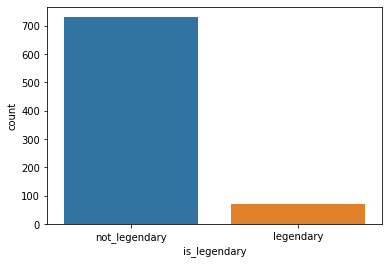

In [387]:
g = sns.countplot(df['is_legendary'])
g.set_xticklabels(['not_legendary','legendary'])


In [388]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 0.8,random_state=42,k_neighbors=20)
xpca_train_res, y_train_res = sm.fit_resample(train_X_pca, train_y)

In [389]:
y_train_res.value_counts()

0    584
1    467
Name: is_legendary, dtype: int64

In [390]:
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-0.543042,0.388759,2.534681,-1.442152,3.195458,0.048425,-0.206861,-0.214642,1.118446,-1.227843,-0.222984,0.313955,0.509419,1.756252,0.465226,-0.900437,-0.299224,0.105344,-0.570800,0.086778,-1.508026,0.233489,0.801305,-0.926001,-1.061674,0.835062,-0.949692,-0.442428,0.188928,0.858308,-0.259430,-0.779904
1,0.736509,2.181658,1.376896,3.820666,-2.000790,0.971908,2.616632,0.766971,3.252473,-0.174657,0.071546,1.614133,0.269941,-0.574021,2.402001,-1.440391,3.204120,0.768285,-1.634202,0.748642,-1.000087,0.899124,-1.030587,0.767152,1.901736,-2.074715,-1.087313,0.039650,-2.668411,0.606117,3.430564,2.421606
2,-2.664251,-2.068178,1.897255,-0.901876,-2.232867,-0.071193,2.207363,0.085166,0.400540,-0.275547,-1.336489,-0.552353,-0.718012,-2.019693,1.764470,-0.055148,0.543152,1.015997,-0.287153,-0.075662,-1.131597,-0.973968,-0.899277,2.412776,0.202434,-0.352430,1.204003,-1.271036,1.787467,-0.230799,-0.495844,-2.027458
3,-1.652647,0.754584,2.014226,-1.495028,3.708789,0.751389,0.041141,-0.115451,1.587872,0.508537,-0.556015,0.676299,-0.084845,1.102344,0.118223,-1.355636,0.135025,-0.064681,-1.628176,-2.312086,0.193691,1.220161,1.413520,-1.387428,-0.073098,1.577469,-0.041361,-0.387651,1.014275,-0.238037,1.127886,-0.941591
4,2.578787,-0.305278,-0.674379,1.833601,2.693153,-1.016333,1.025741,-0.738229,-0.922565,0.399077,-1.250565,-0.043934,0.000559,-0.969761,-0.620096,0.194330,0.187930,-0.767661,-0.009754,0.257249,-0.601701,0.287216,-0.044278,0.499525,0.885262,0.357686,1.351384,-0.355133,-0.676134,-0.240664,0.170097,0.138558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,2.116345,-0.600554,2.549009,-0.947598,3.162042,-0.678687,-0.206374,-0.842847,2.015438,-0.573457,-1.573971,0.351968,-0.220815,0.677619,-0.679200,-1.407816,-0.524739,-0.305178,-0.991547,1.402580,-1.098843,1.272576,1.112968,-0.235410,0.277736,0.971726,0.735953,-0.988910,-0.677848,0.087103,-0.020080,-0.406409
1047,7.428611,-4.563779,-5.164326,-2.634429,0.538586,2.496415,-0.561520,2.050361,-1.604771,1.617733,2.726422,1.009644,-0.166729,2.395229,2.379262,3.946305,0.334578,2.299974,-2.647820,-0.994433,-0.227406,-2.906566,1.436850,-0.378331,-1.657156,-2.526653,-0.401749,0.446111,2.029205,0.115651,0.597117,-0.062166
1048,4.647014,-1.246303,2.017998,-0.938678,2.622726,-0.336320,-0.274297,0.323683,1.317309,1.390186,-1.601526,0.007766,-0.238599,1.342686,-0.422969,0.048793,0.052833,-0.095452,-1.215698,-0.904870,-1.332095,0.082781,1.516524,-0.326759,-0.653038,-0.355454,-0.539893,0.012673,0.894856,0.345040,-0.119598,-0.028583
1049,3.301086,-2.107378,0.319973,2.512017,0.603102,-0.072496,-0.448678,0.336130,1.284713,0.384634,0.083526,-1.327394,0.430735,-1.731569,0.061059,-0.148501,-1.000086,-1.524592,0.311103,-0.337749,0.665861,0.197171,0.395597,0.394874,0.099021,-0.594697,1.021216,-0.829879,0.191802,0.064664,0.220843,1.004927


# Traning Models

In [391]:
xpca_train_res
y_train_res
test_X_pca
test_y 
train_X = xpca_train_res
train_y = y_train_res
test_X = test_X_pca
test_y= test_y


In [392]:
#define functions for classifiers

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
def classifier(model):
    
    clf = model
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)
    
    kf=KFold(n_splits=5)
    cv_score=cross_val_score(clf,train_X,train_y,cv=kf)
    acc_score = accuracy_score(test_y, y_pred)
    
    print("Cross Validation Scores are {}".format(cv_score))
    print("Average Cross Validation score :{}".format(cv_score.mean()))
    #print(confusion_matrix(test_y, y_pred))
    print(classification_report(test_y, y_pred))
    print("accuracy: ", acc_score)
    return clf, acc_score, cv_score.mean()

In [393]:
#define functions for comparing RMSE

from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score

def compare_RMSE(model,train_X,train_y,test_X,test_y):
    
    # test
    test_rmse = mean_squared_error(test_y, model.predict(test_X), squared=False)
    print(f"Test set RMSE:", test_rmse)

    # cv
    MSE_CV_scores = - cross_val_score(model, train_X, train_y, cv=10, 
                                      scoring='neg_mean_squared_error') 
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)
    print(f"CV RMSE:", RMSE_CV)

    # train
    RMSE_train = (mean_squared_error(train_y, model.predict(train_X)))**(1/2)
    print(f"Training set RMSE:",RMSE_train)

In [394]:
#define functions for confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt

def draw_confusion_matrix(model,test_X,test_y):

    cnf_matrix = metrics.confusion_matrix(test_y, model.predict(test_X))
    # create heatmap
    fig, ax = plt.subplots()

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [395]:
test_y

name
Tympole       0
Jirachi       1
Gothorita     0
Bouffalant    0
Palossand     0
             ..
Tapu Bulu     1
Salazzle      0
Horsea        0
Blitzle       0
Chatot        0
Name: is_legendary, Length: 161, dtype: int64

### logistic regression


In [396]:
#logistic regression

logistic_regression, acc_log_reg,log_mean_cv_score = classifier(LogisticRegression(max_iter = 1000))

Cross Validation Scores are [0.9478673  0.94761905 0.96666667 0.96666667 0.97619048]
Average Cross Validation score :0.9610020311442111
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       147
           1       0.74      1.00      0.85        14

    accuracy                           0.97       161
   macro avg       0.87      0.98      0.92       161
weighted avg       0.98      0.97      0.97       161

accuracy:  0.968944099378882


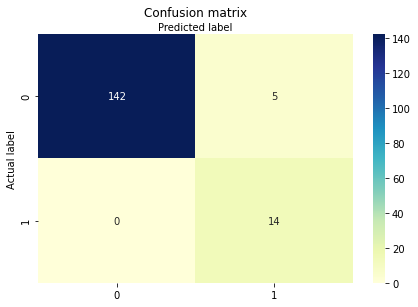

In [397]:
draw_confusion_matrix(logistic_regression,test_X,test_y)

In [398]:
roc_curve(test_y, logistic_regression.predict(test_X))

(array([0.        , 0.03401361, 1.        ]),
 array([0., 1., 1.]),
 array([2, 1, 0]))

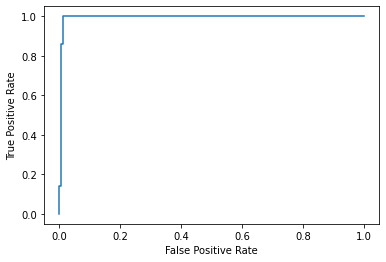

In [399]:
y_pred_proba = logistic_regression.predict_proba(test_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [400]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print('roc score:',roc_auc_score(test_y,y_pred_proba))


roc score: 0.9931972789115646


In [401]:
compare_RMSE(logistic_regression,train_X, train_y,test_X,test_y)

Test set RMSE: 0.17622684421256035
CV RMSE: 0.1717726406383677
Training set RMSE: 0.12718125396696223


### random forest


In [402]:
#random forest
random_forest, acc_random_forest,rf_mean_cv_score = classifier(RandomForestClassifier(n_estimators = 1000, max_depth = 5,  max_features = 10))

Cross Validation Scores are [0.9478673  0.93333333 0.97142857 0.94285714 0.94761905]
Average Cross Validation score :0.9486210787632589
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       147
           1       0.67      0.86      0.75        14

    accuracy                           0.95       161
   macro avg       0.83      0.91      0.86       161
weighted avg       0.96      0.95      0.95       161

accuracy:  0.9503105590062112


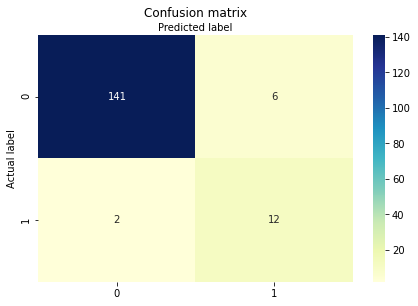

In [403]:
draw_confusion_matrix(random_forest,test_X,test_y)

In [404]:
compare_RMSE(random_forest,train_X, train_y,test_X,test_y)

Test set RMSE: 0.22291128503014113
CV RMSE: 0.1798471947990542
Training set RMSE: 0.11946598590717192


In [405]:
importances = random_forest.feature_importances_
std = np.std([random_forest.feature_importances_ for tree in random_forest.estimators_], axis=0)

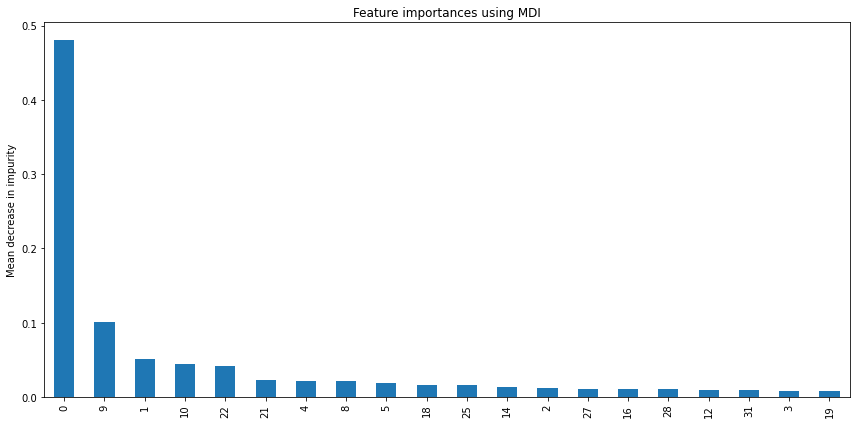

In [406]:
forest_importances = pd.Series(importances, index=train_X_pca.columns)
forest_importances = forest_importances.sort_values(ascending=False)
forest_importances = forest_importances[:20]
fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=std[:20], ax=ax,figsize=(12, 6))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### SGD

In [407]:
#SGD
SGD, acc_sgd,SGD_mean_cv_score = classifier(SGDClassifier())

Cross Validation Scores are [0.97156398 0.94761905 0.96666667 0.96666667 0.91904762]
Average Cross Validation score :0.9543127962085309
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       147
           1       0.82      1.00      0.90        14

    accuracy                           0.98       161
   macro avg       0.91      0.99      0.95       161
weighted avg       0.98      0.98      0.98       161

accuracy:  0.9813664596273292


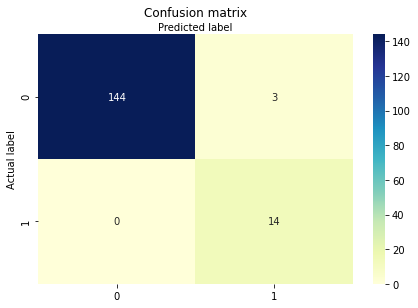

In [408]:
draw_confusion_matrix(SGD,test_X,test_y)

In [409]:
# Evaluate the model by comparing three RMSE's.
compare_RMSE(SGD,train_X, train_y,test_X,test_y)

Test set RMSE: 0.136504726557987
CV RMSE: 0.1689511005987561
Training set RMSE: 0.12338393969512715


### decision tree

In [410]:
#decision tree
decision_tree, acc_decision_tree, decision_tree_mean_cv_score= classifier(DecisionTreeClassifier())

Cross Validation Scores are [0.91469194 0.91428571 0.93809524 0.87142857 0.93809524]
Average Cross Validation score :0.9153193410065448
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       147
           1       0.53      0.57      0.55        14

    accuracy                           0.92       161
   macro avg       0.75      0.76      0.75       161
weighted avg       0.92      0.92      0.92       161

accuracy:  0.9192546583850931


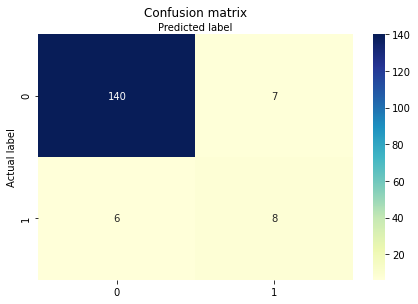

In [411]:
draw_confusion_matrix(decision_tree,test_X,test_y)

In [412]:
compare_RMSE(decision_tree,train_X, train_y,test_X,test_y)

Test set RMSE: 0.28415724804218323
CV RMSE: 0.24283071575467205
Training set RMSE: 0.0


### SVC

In [413]:
#Linear SVC
linear_SVC, acc_linear_svc,linear_SVC_mean_cv_score = classifier(LinearSVC(max_iter = 100))

Cross Validation Scores are [0.93364929 0.93333333 0.96666667 0.95238095 0.96190476]
Average Cross Validation score :0.9495870006770482
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       147
           1       0.74      1.00      0.85        14

    accuracy                           0.97       161
   macro avg       0.87      0.98      0.92       161
weighted avg       0.98      0.97      0.97       161

accuracy:  0.968944099378882


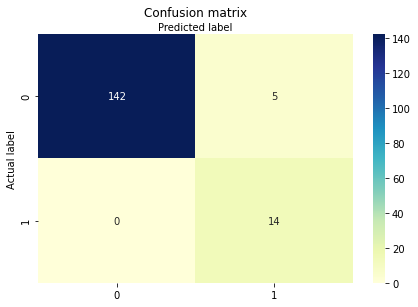

In [414]:
draw_confusion_matrix(linear_SVC,test_X,test_y)

In [415]:
compare_RMSE(linear_SVC,train_X, train_y,test_X,test_y)

Test set RMSE: 0.17622684421256035
CV RMSE: 0.20686771080906236
Training set RMSE: 0.15728427904235218


### GaussianNB


In [416]:
#GaussianNB
gaussian_NB, acc_gnb,gaussian_NB_mean_cv_score = classifier(GaussianNB())

Cross Validation Scores are [0.8056872  0.88095238 0.90952381 0.84761905 0.94761905]
Average Cross Validation score :0.878280297901151
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       147
           1       0.41      0.64      0.50        14

    accuracy                           0.89       161
   macro avg       0.69      0.78      0.72       161
weighted avg       0.92      0.89      0.90       161

accuracy:  0.8881987577639752


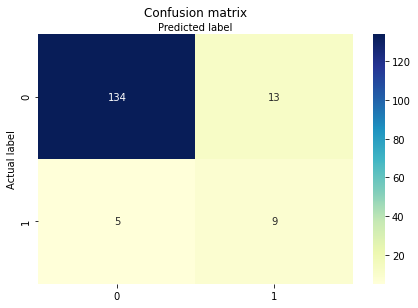

In [417]:
draw_confusion_matrix(gaussian_NB,test_X,test_y)

In [418]:
compare_RMSE(gaussian_NB,train_X, train_y,test_X,test_y)

Test set RMSE: 0.3343669275452117
CV RMSE: 0.3515081101233367
Training set RMSE: 0.34761659599565725


### KNeighbors Classifier


In [419]:
#KNeighbors Classifier
kneighbors, acc_knn,kneighbors_mean_cv_score = classifier(KNeighborsClassifier())

Cross Validation Scores are [0.86255924 0.9047619  0.92857143 0.99047619 1.        ]
Average Cross Validation score :0.9372737531031371
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       147
           1       0.42      0.71      0.53        14

    accuracy                           0.89       161
   macro avg       0.69      0.81      0.73       161
weighted avg       0.92      0.89      0.90       161

accuracy:  0.8881987577639752


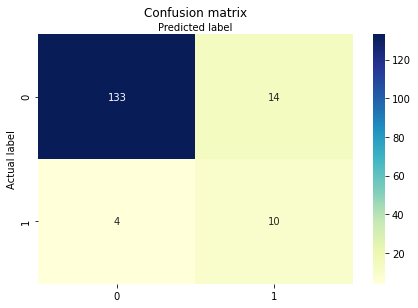

In [420]:
draw_confusion_matrix(kneighbors,test_X,test_y)

In [421]:
compare_RMSE(kneighbors,train_X, train_y,test_X,test_y)

Test set RMSE: 0.3343669275452117
CV RMSE: 0.21813552831940097
Training set RMSE: 0.1850759095426907


### Perceptron


In [422]:
#Perceptron
perceptron, acc_perceptron,perceptron_mean_cv_score = classifier(Perceptron())

Cross Validation Scores are [0.92890995 0.93333333 0.95238095 0.94285714 0.98571429]
Average Cross Validation score :0.9486391333784698
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       147
           1       0.57      0.93      0.70        14

    accuracy                           0.93       161
   macro avg       0.78      0.93      0.83       161
weighted avg       0.96      0.93      0.94       161

accuracy:  0.9316770186335404


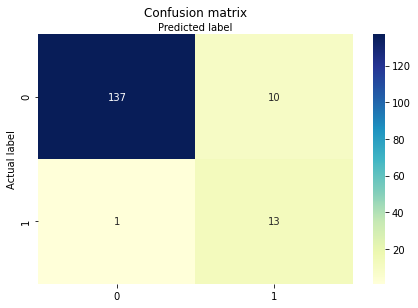

In [423]:
draw_confusion_matrix(perceptron,test_X,test_y)

In [424]:
compare_RMSE(perceptron,train_X, train_y,test_X,test_y)

Test set RMSE: 0.2613866510869666
CV RMSE: 0.22460907438991173
Training set RMSE: 0.1876288013045236


### All Model Accuracy

In [425]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Gaussain Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Descent'],
    
    'Score': [acc_log_reg, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd],
    
     'Average CV score': [log_mean_cv_score, linear_SVC_mean_cv_score, 
              kneighbors_mean_cv_score,  decision_tree_mean_cv_score, rf_mean_cv_score, gaussian_NB_mean_cv_score, 
              perceptron_mean_cv_score, SGD_mean_cv_score]   
    
    })

models.sort_values(by='Score', ascending=False)

,Model,Score,Average CV score
7,Stochastic Gradient Descent,0.981366,0.954313
0,Logistic Regression,0.968944,0.961002
1,Linear SVC,0.968944,0.949587
4,Random Forest,0.950311,0.948621
6,Perceptron,0.931677,0.948639
3,Decision Tree,0.919255,0.915319
2,KNN,0.888199,0.937274
5,Gaussain Naive Bayes,0.888199,0.878280
